In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# initializing and refining the data
energy = pd.read_csv('energy.csv').transpose()
energy.columns = [100, 110, 130, 160, 200]
energy.drop('Unnamed: 0', inplace=True)
energy.index = np.linspace(0.1, 0.7, 80)

magnet = pd.read_csv('magnet.csv').transpose()
magnet.columns = [100, 110, 130, 160, 200]
magnet.drop('Unnamed: 0', inplace=True)
magnet.index = np.linspace(0.1, 0.7, 80)

ksi = pd.read_csv('ksi.csv').transpose()
ksi.columns = [100, 110, 130, 160, 200]
ksi.drop('Unnamed: 0', inplace=True)
ksi.index = np.linspace(0.1, 0.7, 80)

heat_cap = pd.read_csv('heat_cap.csv').transpose()
heat_cap.columns = [100, 110, 130, 160, 200]
heat_cap.drop('Unnamed: 0', inplace=True)
heat_cap.index = np.linspace(0.1, 0.7, 80)

spin_cor = pd.read_csv('spin_cor.csv').transpose()
spin_cor.columns = [100, 110, 130, 160, 200]
spin_cor.drop('Unnamed: 0', inplace=True)
spin_cor.index = np.linspace(0.1, 0.7, 80)

spin_cor_error = pd.read_csv('spin_cor_error.csv').transpose()
spin_cor_error.columns = [100, 110, 130, 160, 200]
spin_cor_error.drop('Unnamed: 0', inplace=True)
spin_cor_error.index = np.linspace(0.1, 0.7, 80)


# Plotting...

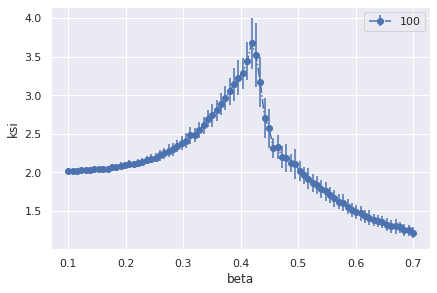

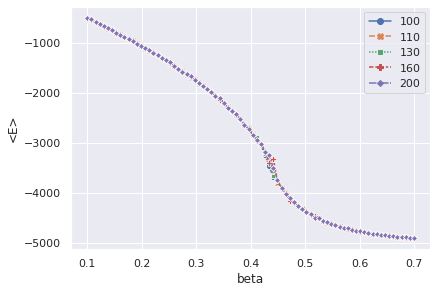

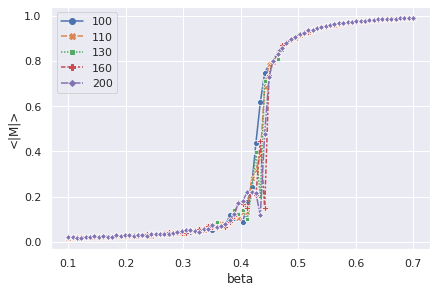

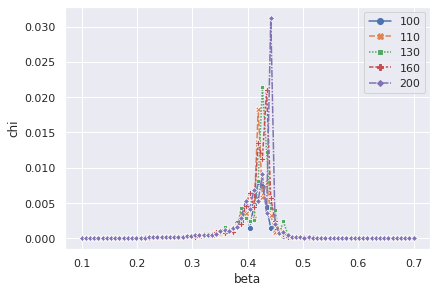

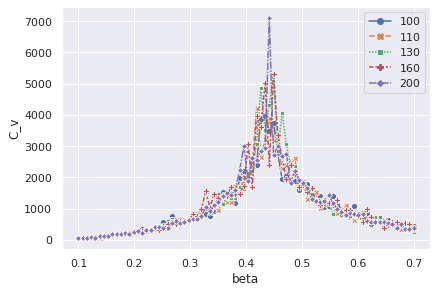

In [3]:

sns.set_theme()

plt.errorbar(x=np.linspace(0.1, 0.7, 80), y=spin_cor[100],
             yerr=spin_cor_error[100], marker='o', ls='-.', label='100')
plt.tight_layout()
plt.legend()
plt.xlabel("beta")
plt.ylabel("ksi")
plt.savefig("spin_cor_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()


sns.lineplot(data=energy, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("<E>")
plt.savefig("energy_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

sns.lineplot(data=magnet, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("<|M|>")
plt.savefig("magnet_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

sns.lineplot(data=ksi, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("chi")
plt.savefig("ksi_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

sns.lineplot(data=heat_cap, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("C_v")
plt.savefig("heat_cap_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

# Finding The critical Temp and $c_0$

In [10]:
arr = heat_cap.to_numpy()
row = arr.T[0]

Temp = 1 / np.linspace(0.1, 0.7, 80)

idxmax = np.where(row == np.max(row))[0][0]
T_c = Temp[idxmax]

Temp = np.delete(Temp, idxmax)
row = np.delete(row, idxmax)

np.absolute(Temp - T_c)

popt, pcov = np.polyfit(np.absolute(Temp - T_c), np.log(row), deg=1, full=False, cov=True)
print("c_0 is:", popt[1], "+/-", np.sqrt(np.diag(pcov))[1])

c_0 is: 7.2377610113360475 +/- 0.06546934262332925


In [65]:
def find_max(series):
    arr = series.to_numpy().T
    critical = np.max(arr)
    
    return critical


spin_max = []
for column in spin_cor.columns:
    spin_max.append(find_max(spin_cor[column]))

x_ax = np.log(spin_cor.columns.to_numpy())

popt, pcov = np.polyfit(x_ax, np.log(np.array(spin_max)),
                       deg=1, full=False, cov=True)

print(- popt[0])
print(np.sqrt(np.diag(pcov))[0])

0.020620634315939048
0.08041608936372731


# Same thing for $C_v$

In [41]:
cv_max = []

for column in heat_cap.columns:
    cv_max.append(find_max(heat_cap[column]))

x_ax = np.log(heat_cap.columns.to_numpy())

popt, pcov = np.polyfit(x_ax, np.log(np.array(cv_max)),
                       deg=1, full=False, cov=True)

print(-popt[0])
print(np.sqrt(np.diag(pcov))[0])

-0.7943346589148823
0.12520392782336906


# Same for $\chi$

In [42]:
ksi_max = []

for column in ksi.columns:
    ksi_max.append(find_max(ksi[column]))

x_ax = np.log(ksi.columns.to_numpy())

popt, pcov = np.polyfit(x_ax, np.log(np.array(ksi_max)),
                       deg=1, full=False, cov=True)

print(-popt[0])
print(np.sqrt(np.diag(pcov))[0])

-1.4948953135796301
0.5616419930365583


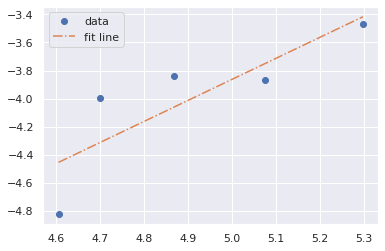

In [55]:
plt.plot(x_ax, np.log(np.array(ksi_max)), ls='', marker='o', label="data")
plt.plot(x_ax, popt[0] * x_ax + popt[1], ls='-.', label='fit line')
plt.legend()
plt.show()